## EDA Part 2: Peak Demand + Installed Capacity

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
peak_demand = pd.read_csv('./datasets/Peak Demand.csv')

In [3]:
capacity = pd.read_csv('./datasets/Generating-Plant-Availability.csv')

In [4]:
peak_demand.iloc[0]

System Demand *                 Month
Unnamed: 1         Peak System demand
Name: 0, dtype: object

In [5]:
peak_demand.dropna(inplace=True)
peak_demand.columns = peak_demand.iloc[0]

In [6]:
peak_demand = peak_demand[1:]

In [7]:
peak_demand.rename(columns={'Month':'Date', 'Peak System demand': 'peak_system_demand_mw'},inplace=True)

In [ ]:
#some initial data cleaning led to this
peak_demand

,Date,peak_system_demand_mw
1,Jan-09,"5,488"
2,Feb-09,"5,629"
3,Mar-09,"5,482"
4,Apr-09,"5,806"
5,May-09,"5,926"
...,...,...
191,Nov-24,"7,859"
192,Dec-24,"7,750"
193,Jan-25,"7,601"
194,Feb-25,"7,661"


In [8]:

peak_demand['Date'] = pd.to_datetime(peak_demand['Date'], format='%b-%y')

In [9]:

capacity = capacity[["Month", "Outage Capacity (MW)", "Remaining Capacity (MW)"]]

In [10]:
capacity.rename(columns={'Month': 'Date', 'Outage Capacity (MW)': 'outage_capacity_MW', 'Remaining Capacity (MW)':'remaining_capacity_MW'}, inplace=True)

In [11]:
capacity['Date'] = pd.to_datetime(capacity['Date'], format = "%b-%y")

In [12]:
capacity['total_capacity_MW'] = capacity['outage_capacity_MW'] + capacity['remaining_capacity_MW']

In [13]:
capacity.head()

,Date,outage_capacity_MW,remaining_capacity_MW,total_capacity_MW
0,2003-01-01,954,8085.0,9039.0
1,2003-02-01,1818,7221.0,9039.0
2,2003-03-01,2004,7035.0,9039.0
3,2003-04-01,1364,7676.0,9040.0
4,2003-05-01,1377,7663.0,9040.0


In [ ]:
merged = pd.merge(left = peak_demand, right = capacity, how = 'left', on = 'Date')
merged['peak_system_demand_mw'] = merged['peak_system_demand_mw'].str.replace(',', '', regex=False).astype(float)
merged_melted = merged.melt(id_vars='Date',var_name='Metric', value_name='Value')

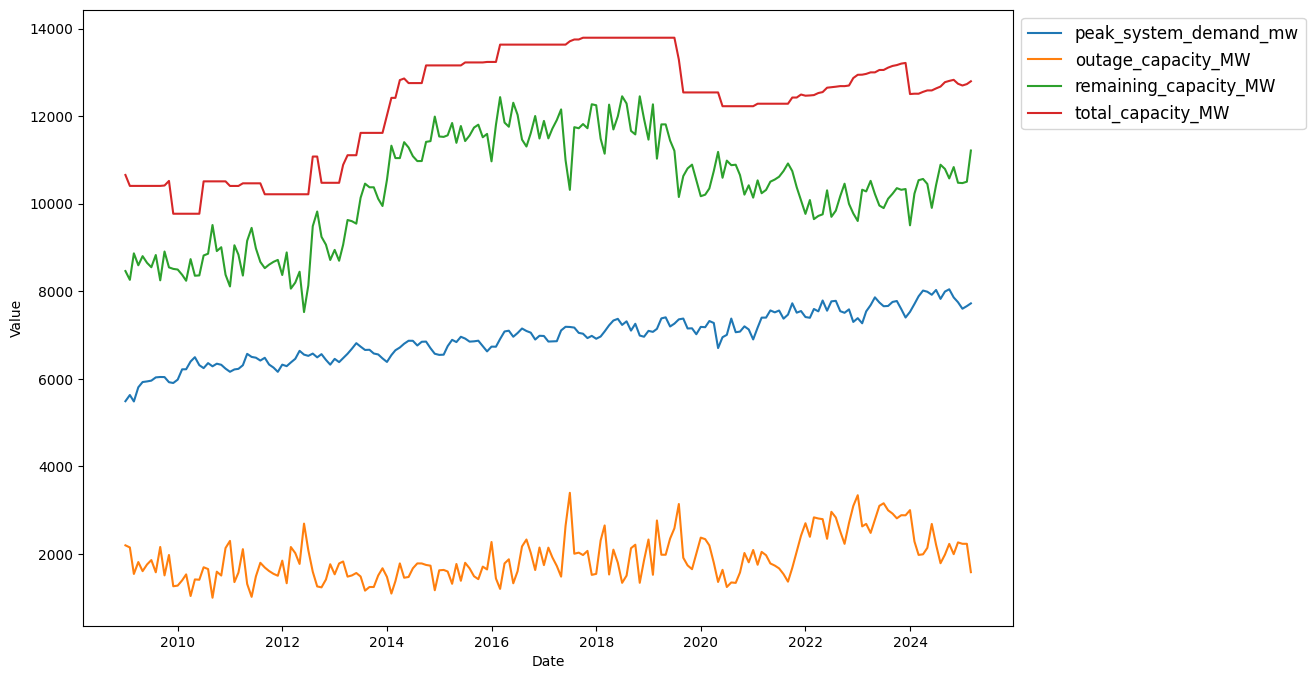

In [ ]:
# plot chart to show peak demand, outage,remaining & total capacity.
plt.figure(figsize=(12, 8))
sns.lineplot(data=merged_melted, x='Date', y='Value', hue = 'Metric')
plt.legend(
    loc='upper left',            
    bbox_to_anchor=(1, 1),         
    fontsize=12
)
plt.show()

In [20]:
merged['percentage_capacity_available'] = round(merged['remaining_capacity_MW'] / merged['total_capacity_MW'],4)
merged

,Date,peak_system_demand_mw,outage_capacity_MW,remaining_capacity_MW,total_capacity_MW,percentage_capacity_available
0,2009-01-01,5488.0,2195,8462.0,10657.0,0.7940
1,2009-02-01,5629.0,2146,8261.0,10407.0,0.7938
2,2009-03-01,5482.0,1541,8866.0,10407.0,0.8519
3,2009-04-01,5806.0,1813,8594.0,10407.0,0.8258
4,2009-05-01,5926.0,1605,8802.0,10407.0,0.8458
...,...,...,...,...,...,...
190,2024-11-01,7859.0,1993,10837.2,12830.2,0.8447
191,2024-12-01,7750.0,2262,10479.2,12741.2,0.8225
192,2025-01-01,7601.0,2230,10471.2,12701.2,0.8244
193,2025-02-01,7661.0,2230,10503.3,12733.3,0.8249


<Axes: xlabel='Date'>

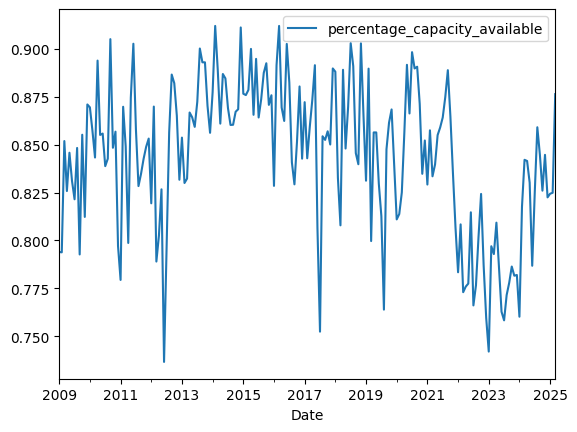

In [21]:
merged.plot(kind = 'line', x = 'Date', y = 'percentage_capacity_available')

In [22]:
merged['percentage_capacity_available'].min()

np.float64(0.7366)

In [25]:
#create new column for a lowest scenario capacity based on historic lowest % capacity available.
merged['lowest_scenario_capacity_MW'] = round(merged['total_capacity_MW'] * merged['percentage_capacity_available'].min(),2)

In [26]:
merged.head()

,Date,peak_system_demand_mw,outage_capacity_MW,remaining_capacity_MW,total_capacity_MW,percentage_capacity_available,lowest_scenario_capacity_MW
0,2009-01-01,5488.0,2195,8462.0,10657.0,0.7940,7849.95
1,2009-02-01,5629.0,2146,8261.0,10407.0,0.7938,7665.80
2,2009-03-01,5482.0,1541,8866.0,10407.0,0.8519,7665.80
3,2009-04-01,5806.0,1813,8594.0,10407.0,0.8258,7665.80
4,2009-05-01,5926.0,1605,8802.0,10407.0,0.8458,7665.80


In [ ]:
#new columns for ratio of peak demand to lowest capacity and peak demand to remaining
merged['peak_demand_lowest_capacity_ratio'] = round(merged['peak_system_demand_mw'] / merged['lowest_scenario_capacity_MW'],4)
merged['peak_demand_remaining_capacity_ratio'] = round(merged['peak_system_demand_mw'] / merged['remaining_capacity_MW'],4)

<Axes: xlabel='Date'>

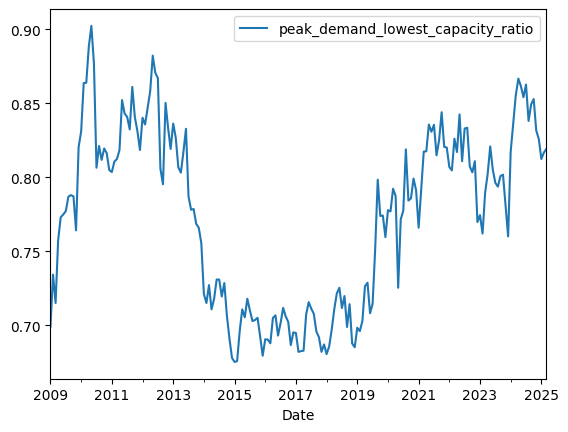

In [29]:
merged.plot(kind = 'line', x = 'Date', y = 'peak_demand_lowest_capacity_ratio')

<Axes: xlabel='Date'>

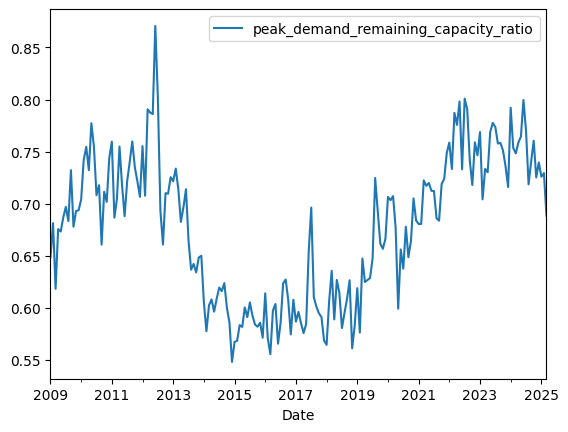

In [30]:
merged.plot(kind = 'line', x = 'Date', y = 'peak_demand_remaining_capacity_ratio')

## Seems like peak demand to capacity ratio is back on the rise

In [ ]:
#export to csv
merged.to_csv('peakdemand_capacity.csv')